In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist #손글씨 이미지 데이터 로드
(x_train,y_train),(x_valid,y_valid) = mnist.load_data()

print(x_train.shape,y_train.shape) 
print(x_valid.shape,y_valid.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


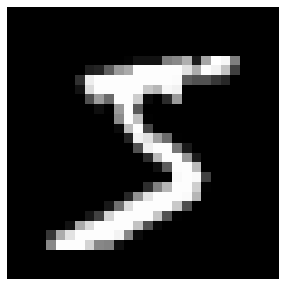

In [3]:
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx], cmap = "gray")
    plt.axis("off")
    plt.show()
    
    
plot_image(x_train,0)

In [4]:
print(x_train.min(),x_train.max())

0 255


In [5]:
x_train = x_train/255.0  # 안정적인 학습을 위해서 입력 이미지 픽셀 값을 정규화
x_valid = x_valid/255.0

In [7]:
x_train_in = x_train[..., tf.newaxis] # 흑백 이미지에 색상 채널을 하나 추가
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape)

(60000, 28, 28, 1)


In [8]:
## 합성곱 레이어 하나와 풀링 레이어를 하나 추가한다.
## 합성곱은 Conv2D 레이어, 커널은(3,3), 활성화 함수는 ReLU 함수 

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1), name ='conv'),
    # Conv2D = 기본적인 합성곱 함수
    tf.keras.layers.MaxPooling2D((2,2),name='pool'),
    # 합성곱으로 인해서 줄어든 이미지를 다시 맥스풀링 레이어를 통해서 더 축소
    # 28,28 -> 합성곱 -> 26,26 -> 풀링 -> 13,13
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv (Conv2D)                (None, 26, 26, 32)        320       
_________________________________________________________________
pool (MaxPooling2D)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 모델 컴파일

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 모델 훈련

history = model.fit(x_train_in,y_train,validation_data=(x_valid_in,y_valid),epochs=10)
# Epoch 분석 시 Epoch 4/10 이후로는 훈련 셋에 대해서는 정확도가 계속 올라가는 반면, 검증 셋에 대해서는 정확도가 더 높아지지 않는다. 
# -> 과대 적합

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2211 - accuracy: 0.9357 - val_loss: 0.0914 - val_accuracy: 0.9729
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0822 - accuracy: 0.9761 - val_loss: 0.0688 - val_accuracy: 0.9788
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0609 - accuracy: 0.9822 - val_loss: 0.0613 - val_accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0502 - accuracy: 0.9849 - val_loss: 0.0520 - val_accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0416 - accuracy: 0.9876 - val_loss: 0.0560 - val_accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0361 - accuracy: 0.9891 - val_loss: 0.0562 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0310 - accuracy: 0.9908 - val_loss: 0.0530 - val_ac

In [19]:
model.evaluate(x_valid_in, y_valid)
# Loss(대입 결과와 실제 경과와의 차이)는 0.05, 정확도는 98%를 나타낸다.

313/313 [==============================] - 1s 2ms/step - loss: 0.0544 - accuracy: 0.9834


[0.05442177876830101, 0.9833999872207642]

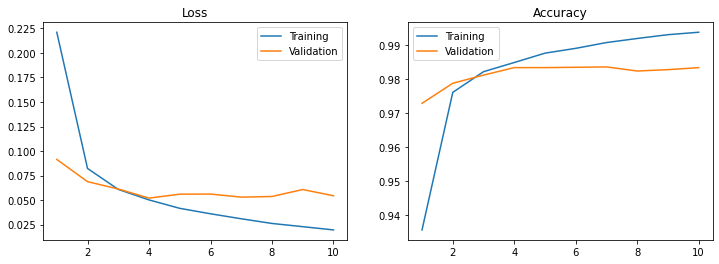

In [23]:
def plot_loss_acc(history, epoch): # Loss와 정확도를 출력하는 함수 정의
    
    loss,val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    # loss 손실값과, acc 정확도를 불러옴
    
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    
    axes[0].plot(range(1,epoch+1),loss,label='Training')
    axes[0].plot(range(1,epoch+1),val_loss,label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title("Loss")
    
    axes[1].plot(range(1,epoch+1),acc,label='Training')
    axes[1].plot(range(1,epoch+1),val_acc,label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title("Accuracy")
    
    plt.show()

plot_loss_acc(history,10)